In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
zip_path = '/content/drive/MyDrive/data.zip'
extract_path = '/content/my_data'

In [7]:
import zipfile

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Unzipping complete. Files are in:", extract_path)


Unzipping complete. Files are in: /content/my_data


In [8]:
import os

print(os.listdir(extract_path))

['Dataset']


In [9]:
import os
import shutil
import random

train_dir = r'/content/my_data/Dataset/Train'
validation_dir = r'/content/my_data/Dataset/Validation'
test_dir = r'/content/my_data/Dataset/Test'

Image loaded successfully!


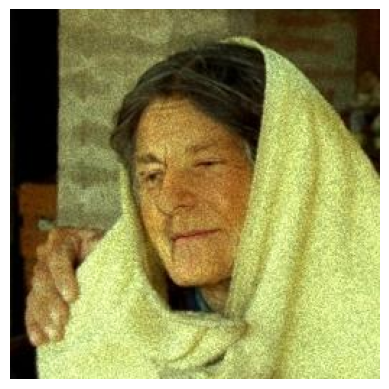

In [10]:
import cv2
import os

image_path = '/content/my_data/Dataset/Test/Fake/fake_0.jpg'
img = cv2.imread(image_path)

if img is not None:
    print("Image loaded successfully!")
else:
    print("Failed to load image.")

import matplotlib.pyplot as plt
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = (224, 224)
batch_size = 16
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,

)

val_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = val_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

Found 140002 images belonging to 2 classes.
Found 39428 images belonging to 2 classes.
Found 10905 images belonging to 2 classes.


In [12]:
print("Checking training data generator...")
for i, (images, labels) in enumerate(train_generator):
    print(f"Batch {i+1}: Images shape = {images.shape}, Labels shape = {labels.shape}")
    if i == 2:
        break

print("\nChecking validation data generator...")
for i, (images, labels) in enumerate(val_generator):
    print(f"Batch {i+1}: Images shape = {images.shape}, Labels shape = {labels.shape}")
    if i == 2:
        break

Checking training data generator...
Batch 1: Images shape = (16, 224, 224, 3), Labels shape = (16,)
Batch 2: Images shape = (16, 224, 224, 3), Labels shape = (16,)
Batch 3: Images shape = (16, 224, 224, 3), Labels shape = (16,)

Checking validation data generator...
Batch 1: Images shape = (16, 224, 224, 3), Labels shape = (16,)
Batch 2: Images shape = (16, 224, 224, 3), Labels shape = (16,)
Batch 3: Images shape = (16, 224, 224, 3), Labels shape = (16,)


In [13]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam

base_model = MobileNetV2(input_shape=(224, 224, 3),
                         include_top=False,
                         weights='imagenet')

base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=output)

model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [14]:
from tensorflow.keras.callbacks import EarlyStopping

steps_per_epoch = train_generator.samples // train_generator.batch_size
validation_steps = val_generator.samples // val_generator.batch_size

early_stopping = EarlyStopping(monitor='val_loss', patience=3)

history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    validation_data=val_generator,
    validation_steps=validation_steps,
    epochs=10,
    callbacks=[early_stopping]
)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8750/8750 ━━━━━━━━━━━━━━━━━━━━ 337s 37ms/step - accuracy: 0.6700 - loss: 0.6159 - val_accuracy: 0.7678 - val_loss: 0.4790
Epoch 2/10
   1/8750 ━━━━━━━━━━━━━━━━━━━━ 2:25 17ms/step - accuracy: 0.6875 - loss: 0.5377

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


8750/8750 ━━━━━━━━━━━━━━━━━━━━ 81s 9ms/step - accuracy: 0.6875 - loss: 0.5377 - val_accuracy: 0.7678 - val_loss: 0.4791
Epoch 3/10
8750/8750 ━━━━━━━━━━━━━━━━━━━━ 325s 34ms/step - accuracy: 0.7484 - loss: 0.5048 - val_accuracy: 0.7780 - val_loss: 0.4648
Epoch 4/10
8750/8750 ━━━━━━━━━━━━━━━━━━━━ 60s 7ms/step - accuracy: 0.8125 - loss: 0.3934 - val_accuracy: 0.7781 - val_loss: 0.4646
Epoch 5/10
8750/8750 ━━━━━━━━━━━━━━━━━━━━ 287s 33ms/step - accuracy: 0.7582 - loss: 0.4900 - val_accuracy: 0.7818 - val_loss: 0.4608
Epoch 6/10
8750/8750 ━━━━━━━━━━━━━━━━━━━━ 61s 7ms/step - accuracy: 0.6875 - loss: 0.4421 - val_accuracy: 0.7816 - val_loss: 0.4611
Epoch 7/10
8750/8750 ━━━━━━━━━━━━━━━━━━━━ 288s 33ms/step - accuracy: 0.7594 - loss: 0.4890 - val_accuracy: 0.7839 - val_loss: 0.4580
Epoch 8/10
8750/8750 ━━━━━━━━━━━━━━━━━━━━ 60s 7ms/step - accuracy: 0.6250 - loss: 0.5743 - val_accuracy: 0.7840 - val_loss: 0.4580
Epoch 9/10
8750/8750 ━━━━━━━━━━━━━━━━━━━━ 322s 37ms/step - accuracy: 0.7588 - loss: 0.48

In [15]:
model.save('xception_deepfake_stage1.h5')


In [16]:
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

model = load_model('xception_deepfake_stage1.h5')

In [17]:
model.trainable = True

In [18]:
model.compile(optimizer=Adam(learning_rate=1e-5),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [19]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

In [20]:
fine_tune_history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    validation_data=val_generator,
    validation_steps=validation_steps,
    epochs=5,
    callbacks=[early_stopping]
)

Epoch 1/5
8750/8750 ━━━━━━━━━━━━━━━━━━━━ 307s 34ms/step - accuracy: 0.7605 - loss: 0.4857 - val_accuracy: 0.7849 - val_loss: 0.4561
Epoch 2/5
8750/8750 ━━━━━━━━━━━━━━━━━━━━ 80s 9ms/step - accuracy: 0.9375 - loss: 0.4180 - val_accuracy: 0.7848 - val_loss: 0.4562
Epoch 3/5
8750/8750 ━━━━━━━━━━━━━━━━━━━━ 313s 36ms/step - accuracy: 0.7584 - loss: 0.4891 - val_accuracy: 0.7855 - val_loss: 0.4559
Epoch 4/5
8750/8750 ━━━━━━━━━━━━━━━━━━━━ 60s 7ms/step - accuracy: 0.8125 - loss: 0.4603 - val_accuracy: 0.7856 - val_loss: 0.4559
Epoch 5/5
8750/8750 ━━━━━━━━━━━━━━━━━━━━ 301s 33ms/step - accuracy: 0.7592 - loss: 0.4886 - val_accuracy: 0.7853 - val_loss: 0.4561


In [21]:
test_loss, test_accuracy = model.evaluate(
    test_generator,
    steps=test_generator.samples // test_generator.batch_size
)

print(f"\nTest Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


681/681 ━━━━━━━━━━━━━━━━━━━━ 21s 31ms/step - accuracy: 0.7173 - loss: 0.5468

Test Accuracy: 71.82%
Test Loss: 0.5454


In [23]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

test_generator.reset()

y_pred_probs = model.predict(test_generator, steps=test_generator.samples // test_generator.batch_size, verbose=1)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

y_true = test_generator.classes[:len(y_pred)]

class_names = list(test_generator.class_indices.keys())

681/681 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step


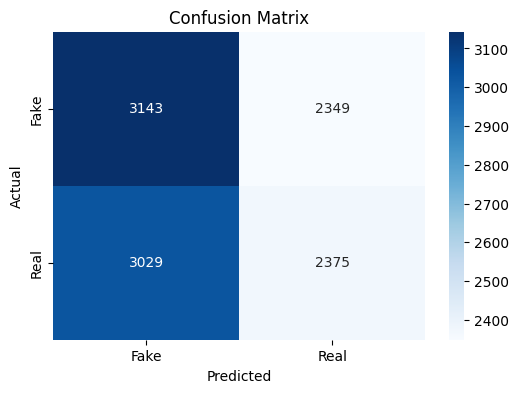

In [24]:
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [25]:
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

Classification Report:
              precision    recall  f1-score   support

        Fake       0.51      0.57      0.54      5492
        Real       0.50      0.44      0.47      5404

    accuracy                           0.51     10896
   macro avg       0.51      0.51      0.50     10896
weighted avg       0.51      0.51      0.50     10896



In [26]:
model.save('xception_deepfake_stage1.h5')